In [80]:
from tqdm import tqdm_notebook
import tensorflow as tf
import numpy as np


In [81]:
import matplotlib.pyplot as plt

In [82]:
xy = np.loadtxt('ulsan2.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, [0]]
y_data = xy[:, [-1]]
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))


print("np.max(xy, 0) :", np.max(xy, 0))
print("np.min(xy, 0) :", np.min(xy, 0))


x_data.shape : (175, 1), 	len(x_data) : 175 
x_data : 
[[2.50500e+01]
 [3.93800e+02]
 [2.05800e+02]
 [5.00000e+01]
 [5.00000e+00]
 [5.29000e+00]
 [3.63000e+01]
 [7.50000e+00]
 [2.50000e+01]
 [7.90000e+01]
 [1.71000e+02]
 [4.60000e+01]
 [4.22800e+02]
 [1.81500e+01]
 [5.30000e+01]
 [4.45000e+01]
 [2.41000e+01]
 [4.29000e+01]
 [3.84000e+02]
 [1.00000e+02]
 [1.10000e+02]
 [1.59400e+02]
 [1.59300e+02]
 [1.24670e+02]
 [1.06493e+03]
 [1.26000e+02]
 [9.00000e+00]
 [4.90000e+01]
 [1.29000e+02]
 [5.99800e+01]
 [3.25000e+01]
 [2.30000e+01]
 [3.82000e+00]
 [8.19000e+00]
 [1.48400e+02]
 [2.45800e+01]
 [8.15000e+02]
 [1.13500e+01]
 [1.65400e+02]
 [7.87800e+03]
 [5.72000e+02]
 [5.57000e+02]
 [2.47200e+03]
 [1.19000e+02]
 [3.90000e+01]
 [4.20000e+01]
 [3.26900e+02]
 [1.63900e+01]
 [1.00000e+00]
 [1.39000e+02]
 [4.20000e+01]
 [6.93000e+00]
 [1.20000e+01]
 [1.50000e+01]
 [1.00000e+01]
 [2.20000e+01]
 [3.08000e+02]
 [2.97000e+01]
 [2.11800e+01]
 [3.20000e+01]
 [1.13400e+02]
 [2.43000e+01]
 [2.11000e+02]


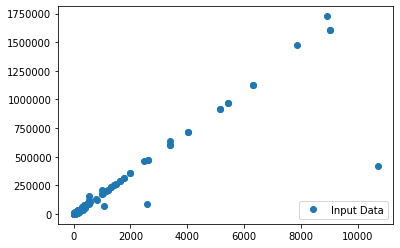

In [83]:
plt.plot(x_data,y_data, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [84]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([1, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

prev_cost = 1
for step in tqdm_notebook(range(1001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    
    if step%10 == 0:
        # print("\nStep", step, "\nCost:", cost_val, "\nPrediction:\n", hy_val)
        # print("Step : {}, \t Cost : {}".format(step, cost_val))
        improvement =  prev_cost - cost_val
        prev_cost = cost_val
        print("Step : {}, \t Cost : {}, \t Improvement : {}".format(step, cost_val,  improvement))

Step : 0, 	 Cost : 120752168960.0, 	 Improvement : -120752168959.0
Step : 10, 	 Cost : inf, 	 Improvement : -inf
Step : 20, 	 Cost : nan, 	 Improvement : nan
Step : 30, 	 Cost : nan, 	 Improvement : nan
Step : 40, 	 Cost : nan, 	 Improvement : nan
Step : 50, 	 Cost : nan, 	 Improvement : nan
Step : 60, 	 Cost : nan, 	 Improvement : nan
Step : 70, 	 Cost : nan, 	 Improvement : nan
Step : 80, 	 Cost : nan, 	 Improvement : nan
Step : 90, 	 Cost : nan, 	 Improvement : nan
Step : 100, 	 Cost : nan, 	 Improvement : nan
Step : 110, 	 Cost : nan, 	 Improvement : nan
Step : 120, 	 Cost : nan, 	 Improvement : nan
Step : 130, 	 Cost : nan, 	 Improvement : nan
Step : 140, 	 Cost : nan, 	 Improvement : nan
Step : 150, 	 Cost : nan, 	 Improvement : nan
Step : 160, 	 Cost : nan, 	 Improvement : nan
Step : 170, 	 Cost : nan, 	 Improvement : nan
Step : 180, 	 Cost : nan, 	 Improvement : nan
Step : 190, 	 Cost : nan, 	 Improvement : nan
Step : 200, 	 Cost : nan, 	 Improvement : nan
Step : 210, 	 Cost : 

In [85]:
def normalize_fixed(x, current_range, normed_range):
    current_min, current_max = tf.expand_dims(current_range[:, 0], 1), tf.expand_dims(current_range[:, 1], 1)
    normed_min, normed_max = tf.expand_dims(normed_range[:, 0], 1), tf.expand_dims(normed_range[:, 1], 1)
    x_normed = (x - current_min) / (current_max - current_min)
    x_normed = x_normed * (normed_max - normed_min) + normed_min
    return x_normed


In [86]:
#    def parse_example(line_batch, 
#                  fixed_range=[[1,10000]],
#                  normed_range=[[0, 1000000000]]):

#        xy = tf.transpose(xy)
#        xy = normalize_fixed(xy, fixed_range, normed_range)

In [87]:

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    print(" max.data :\n {max}, \n\n min.data :\n {min}, \n\n numerator :\n {numerator}, \n\n denominator :\n {denominator} \n".format(
            max = np.max(data, 0), 
            min = np.min(data, 0),
            numerator = numerator,
            denominator = denominator
        ))

    # noise term prevents the zero division
    return numerator / (denominator + 1e-5)


In [89]:
x_data = xy[:, [0]]
y_data = xy[:, [-1]]
print("x_data.shape : {}, \tlen(x_data) : {} \nx_data : \n{}".format(x_data.shape, len(x_data), x_data))
print("-"*25)
print("y_data.shape : {}  \ny_data : \n{}".format(y_data.shape, y_data))


print("np.max(xy, 0) :", np.max(xy, 0))
print("np.min(xy, 0) :", np.min(xy, 0))

xy = MinMaxScaler(xy)
print(" xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) \n", xy)
x_data = xy[:, [0]]
y_data = xy[:, [-1]]

x_data.shape : (175, 1), 	len(x_data) : 175 
x_data : 
[[2.24493607e-03]
 [3.66657339e-02]
 [1.91169605e-02]
 [4.57388209e-03]
 [3.73378134e-04]
 [4.00448043e-04]
 [3.29506211e-03]
 [6.06739486e-04]
 [2.24026875e-03]
 [7.28087360e-03]
 [1.58685707e-02]
 [4.20050416e-03]
 [3.93727235e-02]
 [1.60085876e-03]
 [4.85391589e-03]
 [4.06048726e-03]
 [2.15625879e-03]
 [3.91113618e-03]
 [3.57509553e-02]
 [9.24110878e-03]
 [1.01745538e-02]
 [1.47857741e-02]
 [1.47764403e-02]
 [1.15439184e-02]
 [9.93120521e-02]
 [1.16680665e-02]
 [7.46756268e-04]
 [4.48053749e-03]
 [1.19481003e-02]
 [5.50546078e-03]
 [2.94035277e-03]
 [2.05357978e-03]
 [2.63231574e-04]
 [6.71147194e-04]
 [1.37589835e-02]
 [2.20106402e-03]
 [7.59824514e-02]
 [9.66115971e-04]
 [1.53458407e-02]
 [7.35274911e-01]
 [5.32997288e-02]
 [5.18995598e-02]
 [2.30654344e-01]
 [1.10146552e-02]
 [3.54709243e-03]
 [3.82712600e-03]
 [3.04209832e-02]
 [1.43657229e-03]
 [0.00000000e+00]
 [1.28815453e-02]
 [3.82712600e-03]
 [5.53533086e-04]
 [1.02678


 xy : MinMaxScaler(xy) = numerator / (denominator + 1e-7) 
 [[2.24491348e-03 2.92347831e-04]
 [3.66653651e-02 2.95966007e-02]
 [1.91167686e-02 1.09731751e-02]
 [4.57383646e-03 1.15520814e-02]
 [3.73374409e-04 1.13176252e-03]
 [4.00444027e-04 2.46035313e-04]
 [3.29502905e-03 5.23910508e-04]
 [6.06733433e-04 1.71066914e-03]
 [2.24024639e-03 5.76301524e-03]
 [7.28080049e-03 7.19986157e-03]
 [1.58684123e-02 1.77463833e-02]
 [4.20046225e-03 4.77887411e-03]
 [3.93723287e-02 4.62864824e-02]
 [1.60084269e-03 2.48929835e-04]
 [4.85386746e-03 5.76301524e-03]
 [4.06044675e-03 7.55473156e-04]
 [2.15623714e-03 6.10746501e-04]
 [3.91109707e-03 1.42121583e-03]
 [3.57505977e-02 4.03214283e-02]
 [9.24101658e-03 8.65754858e-03]
 [1.01744523e-02 9.23645590e-03]
 [1.47856260e-02 1.96567737e-02]
 [1.47762923e-02 1.96567737e-02]
 [1.15438029e-02 8.65754858e-03]
 [9.93110612e-02 4.04974110e-02]
 [1.16679501e-02 8.43524840e-03]
 [7.46748818e-04 5.22752700e-04]
 [4.48049279e-03 1.87334185e-03]
 [1.19479811e-0

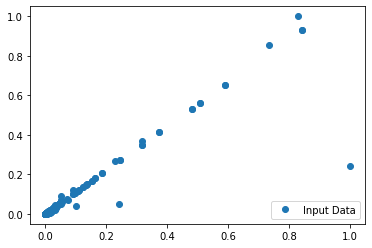

In [90]:
plt.plot(x_data,y_data, 'o', label='Input Data')
plt.legend(loc=4)
plt.show()

In [91]:
# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 1])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([1, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
train = optimizer.minimize(cost)
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

prev_cost = 1
for step in tqdm_notebook(range(1001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    
    if step%10 == 0:
        # print("\nStep", step, "\nCost:", cost_val, "\nPrediction:\n", hy_val)
        # print("Step : {}, \t Cost : {}".format(step, cost_val))
        improvement =  prev_cost - cost_val
        prev_cost = cost_val
        print("Step : {}, \t Cost : {}, \t Improvement : {}".format(step, cost_val,  improvement))

Step : 0, 	 Cost : 1.0401802062988281, 	 Improvement : -0.040180206298828125
Step : 10, 	 Cost : 0.7063176035881042, 	 Improvement : 0.3338626027107239
Step : 20, 	 Cost : 0.4839390218257904, 	 Improvement : 0.22237858176231384
Step : 30, 	 Cost : 0.33576858043670654, 	 Improvement : 0.14817044138908386
Step : 40, 	 Cost : 0.23699451982975006, 	 Improvement : 0.09877406060695648
Step : 50, 	 Cost : 0.17110158503055573, 	 Improvement : 0.06589293479919434
Step : 60, 	 Cost : 0.1270967572927475, 	 Improvement : 0.04400482773780823
Step : 70, 	 Cost : 0.09766289591789246, 	 Improvement : 0.02943386137485504
Step : 80, 	 Cost : 0.0779295489192009, 	 Improvement : 0.01973334699869156
Step : 90, 	 Cost : 0.06465475261211395, 	 Improvement : 0.013274796307086945
Step : 100, 	 Cost : 0.055680617690086365, 	 Improvement : 0.008974134922027588
Step : 110, 	 Cost : 0.04957074299454689, 	 Improvement : 0.0061098746955394745
Step : 120, 	 Cost : 0.04536904767155647, 	 Improvement : 0.00420169532299

In [92]:
# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})

    if step % 100 == 0 or step < 10 :
        # print("\nStep : {} \nCost : {} \nPrediction :\n{}".format(step, cost_val, hy_val))
        print("Step : {} \tCost : {} ".format(step, cost_val))

Step : 0 	Cost : 0.40275025367736816 
Step : 1 	Cost : 0.3885864317417145 
Step : 2 	Cost : 0.37498557567596436 
Step : 3 	Cost : 0.361924946308136 
Step : 4 	Cost : 0.3493832051753998 
Step : 5 	Cost : 0.3373395800590515 
Step : 6 	Cost : 0.325774222612381 
Step : 7 	Cost : 0.31466808915138245 
Step : 8 	Cost : 0.3040028512477875 
Step : 9 	Cost : 0.29376089572906494 
Step : 100 	Cost : 0.04990549758076668 
Step : 200 	Cost : 0.03941074758768082 
Step : 300 	Cost : 0.03527190908789635 
Step : 400 	Cost : 0.031694505363702774 
Step : 500 	Cost : 0.02852780558168888 
Step : 600 	Cost : 0.025723353028297424 
Step : 700 	Cost : 0.023239685222506523 
Step : 800 	Cost : 0.021040111780166626 
Step : 900 	Cost : 0.019092140719294548 
Step : 1000 	Cost : 0.017366986721754074 
Step : 1100 	Cost : 0.015839168801903725 
Step : 1200 	Cost : 0.014486104249954224 
Step : 1300 	Cost : 0.013287809677422047 
Step : 1400 	Cost : 0.012226582504808903 
Step : 1500 	Cost : 0.011286744847893715 
Step : 1600

In [96]:
# Ask score
print("Prediction \t: \n", sess.run(hypothesis, feed_dict={X: [[126]]}))


Prediction 	: 
 [[76.88441]]
